<a href="https://colab.research.google.com/github/1zuu/Machine-Learning-With-Graphs/blob/main/4_Data_Handling_on_PyG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

def format_pytorch_version(version):
  return version.split('+')[0]

TORCH_version = torch.__version__
TORCH = format_pytorch_version(TORCH_version)

def format_cuda_version(version):
  return 'cu' + version.replace('.', '')

CUDA_version = torch.version.cuda
CUDA = format_cuda_version(CUDA_version)

!pip install torch-scatter -f https://data.pyg.org/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-spline-conv -f https://data.pyg.org/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.11.0+cu113.html
     |████████████████████████████████| 7.9 MB 29.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.11.0+cu113.html
     |████████████████████████████████| 3.5 MB 34.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.11.0+cu113.html
     |████████████████████████████████| 2.5 MB 29.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.11.0+cu113.html
     |████████████████████████████████| 750 kB 22.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     

In [18]:
import torch, os
import torch.nn as nn
import torch.nn.functional as F
import torch_geometric.data as data
import torch_geometric.datasets as datasets
import torch_geometric.transforms as transforms
from torch_geometric.utils.convert import to_networkx

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **There are 4 Basic Tasks in Geometric Deep Learning**
  1. Node Classification
  2. Graph Classification
  3. Link Prediction (Properties)
  4. Link Prediction (Interactions)

## We are going to talk about data handling under these basic topics

In [6]:
working_dir = '/content/drive/My Drive/Colab Notebooks/machine-learning-with-graphs/'

**There Are 2 Modules for Data handling in Torch Geometric**
   1. **torch_geometic.data** -> For Custom Datasets
   2. **torch_geometic.datasets** -> Bench-mark datasets already available 

# **torch_geometic.data Module**
  1. torch_geometic.data.data.Data    -> Representing a Graph
  2. torch_geometic.data.batch.Batch  -> Representing Collection of Graph
  3. torch_geometic.data.cluster.ClusterData  -> Group nodes into 
  subgraphs & load them in batches for faster computation on large graph 
  4. torch_geometic.data.sampler.NeighborSampler  -> Sample specific number of neightbours in a neighbourhood

# Data Handling For node Classification with Dummy Data

## 1.data.Data

In [20]:
N = 100 # Number of Nodes in the graph 
D = 16  # Size of the Node Embedding Vector
K = 500 # Number of Edges in the Graph

In [21]:
X = torch.rand((N, D), dtype=torch.float32)

src_nodes = np.random.choice(N, K, replace=True)
dest_nodes = np.random.choice(N, K, replace=True)
edges = torch.tensor([src_nodes, dest_nodes])

In [22]:
edges_attributes = np.random.choice(3, K, replace=True) # Assign 0 or 1 or 2 as the edge attribute

In [23]:
node_labels = torch.rand(N).round().long()
node_labels

tensor([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
        0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
        0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
        1, 1, 0, 1])

In [24]:
graph = data.Data(
                  x = X,
                  edge_index = edges,
                  edge_attr = edges_attributes,
                  y = node_labels
                  )
graph

Data(x=[100, 16], edge_index=[2, 500], edge_attr=[500], y=[100])

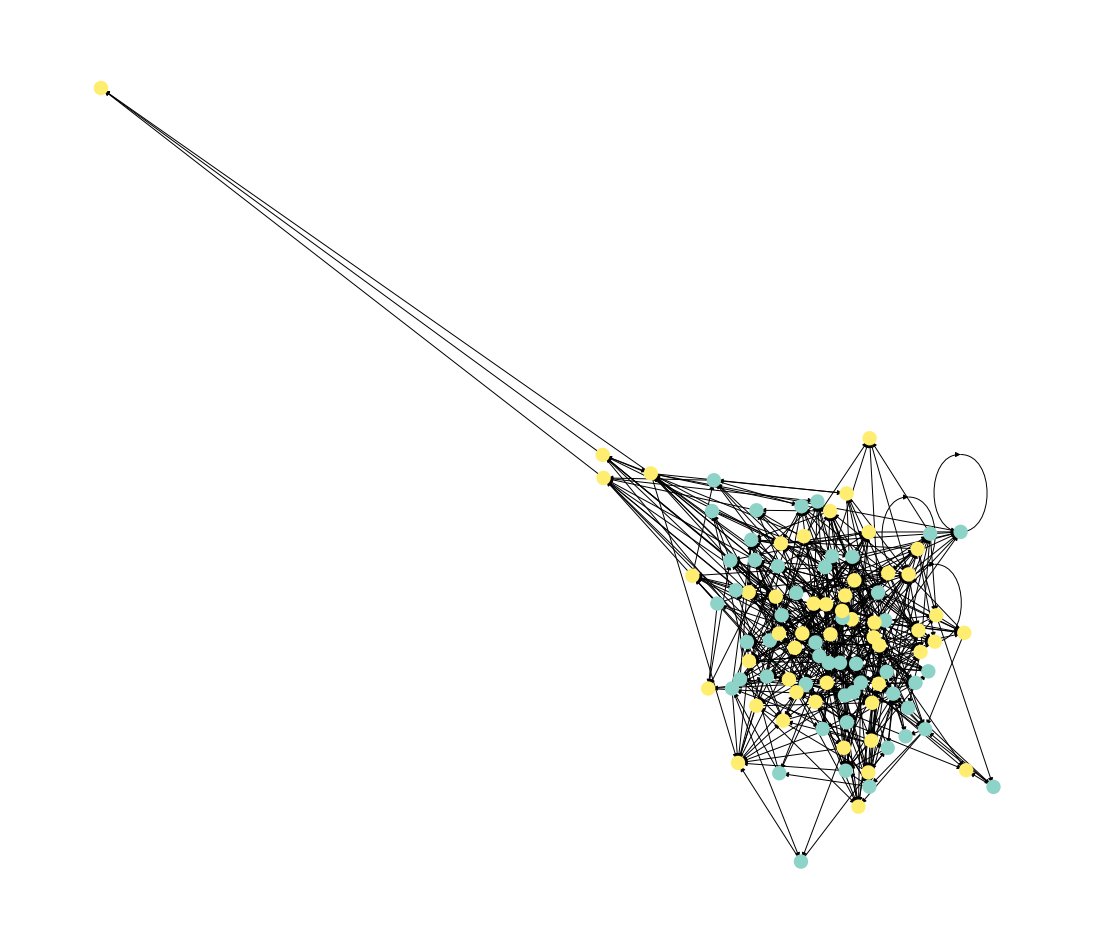

In [25]:
vis_graph = to_networkx(graph)
plt.figure(1,figsize=(15,13)) 
nx.draw(vis_graph, cmap=plt.get_cmap('Set3'),node_color = node_labels,node_size=70,linewidths=6)
plt.show()

## data.Batch

In [26]:
# Create More Graphs by Duplicating the original graph
graph2 = graph
graph3 = graph 

In [28]:
batch = data.Batch().from_data_list([graph, graph2, graph3])

In [29]:
print("Number of graphs:",batch.num_graphs)
print("Graph at index 1:",batch[1])
print("Retrieve the list of graphs:\n",len(batch.to_data_list()))

Number of graphs: 3
Graph at index 1: Data(x=[100, 16], edge_index=[2, 500], edge_attr=[500], y=[100])
Retrieve the list of graphs:
 3


## Datasets

In [31]:
datasets.__all__ # All Available Datasets

['KarateClub',
 'TUDataset',
 'GNNBenchmarkDataset',
 'Planetoid',
 'FakeDataset',
 'FakeHeteroDataset',
 'NELL',
 'CitationFull',
 'CoraFull',
 'Coauthor',
 'Amazon',
 'PPI',
 'Reddit',
 'Reddit2',
 'Flickr',
 'Yelp',
 'AmazonProducts',
 'QM7b',
 'QM9',
 'MD17',
 'ZINC',
 'MoleculeNet',
 'Entities',
 'RelLinkPredDataset',
 'GEDDataset',
 'AttributedGraphDataset',
 'MNISTSuperpixels',
 'FAUST',
 'DynamicFAUST',
 'ShapeNet',
 'ModelNet',
 'CoMA',
 'SHREC2016',
 'TOSCA',
 'PCPNetDataset',
 'S3DIS',
 'GeometricShapes',
 'BitcoinOTC',
 'ICEWS18',
 'GDELT',
 'DBP15K',
 'WILLOWObjectClass',
 'PascalVOCKeypoints',
 'PascalPF',
 'SNAPDataset',
 'SuiteSparseMatrixCollection',
 'AMiner',
 'WordNet18',
 'WordNet18RR',
 'WikiCS',
 'WebKB',
 'WikipediaNetwork',
 'Actor',
 'OGB_MAG',
 'DBLP',
 'MovieLens',
 'IMDB',
 'LastFM',
 'HGBDataset',
 'JODIEDataset',
 'MixHopSyntheticDataset',
 'UPFD',
 'GitHub',
 'FacebookPagePage',
 'LastFMAsia',
 'DeezerEurope',
 'GemsecDeezer',
 'Twitch',
 'Airports',
 'B

In [35]:
working_dir = '/content/drive/My Drive/Colab Notebooks/machine-learning-with-graphs/'

data_folder = 'Cora'
data_dir = os.path.join(working_dir, data_folder)

transform = transforms.Compose([
                      transforms.RandomNodeSplit('train_rest', num_val=500, num_test=500),
                      transforms.TargetIndegree(),
                  ])
cora = datasets.Planetoid(working_dir, data_folder, pre_transform=transforms.NormalizeFeatures(), transform=transform)

Processing...
Done!


In [36]:
print("Cora info:")
print('# of graphs:', len(cora))
print('# Classes (nodes)', cora.num_classes)
print('# Edge features', cora.num_edge_features)
print('# Node features', cora.num_node_features)

Cora info:
# of graphs: 1
# Classes (nodes) 7
# Edge features 1
# Node features 1433
